In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('Student Depression Dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [5]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [6]:
df = df.fillna("")

In [7]:
df = df.drop_duplicates()

In [8]:
df['Sleep Duration'] = df['Sleep Duration'].str.rstrip(' hours')

In [9]:
df['Sleep Duration'] = df['Sleep Duration'].str.lstrip('Less than')

In [10]:
df['Sleep Duration'] = df['Sleep Duration'].str.lstrip('More than ')

In [11]:
df.loc[df['Sleep Duration'] == 'Othe'] = ''

In [12]:
df['Sleep Duration'].loc[df['Sleep Duration'] == '5-6'] = '5.5'

In [13]:
df['Sleep Duration'].loc[df['Sleep Duration'] == '7-8'] = '7.5'

In [14]:
# Number of different gender in this data
gender = df['Gender'].unique()

In [15]:
# Number of Male and Female and ratio between them
male = (df['Gender']=='Male').sum()
female = (df['Gender']=='Female').sum()
ratio = ((male-female)/female) * 100
round(ratio, 2)

25.86

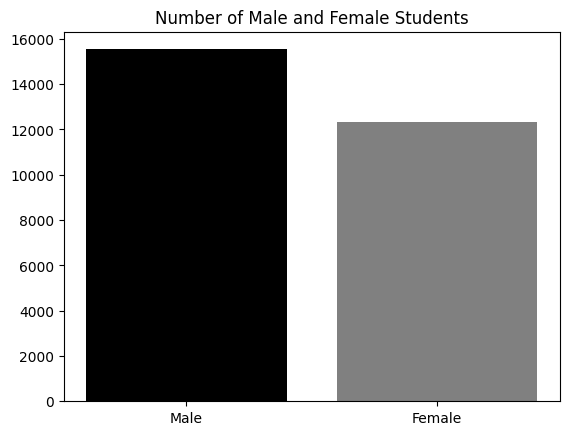

In [16]:
categories = ['Male', 'Female']
count = [male, female]

plt.bar(categories, count, color=['black', 'grey'])
plt.title("Number of Male and Female Students")

plt.show()

In [17]:
# Number of depressed students for each gender
df.groupby('Gender')['Depression'].sum()

Gender
              
Female    7216
Male      9111
Name: Depression, dtype: object

In [ ]:
# Ratio of depressed students for each genders
gender_depression = df.groupby("Gender")['Depression'].value_counts().unstack(fill_value=0)
gender_depression['Ratio'] = gender_depression.apply(lambda x: round(x[1] / x[0], 2) if x[0] > 0 else 0, axis=1)
gender_depression

Depression,0,1,Ratio
Gender,,,
Female,5129,7216,1.41
Male,6427,9111,1.42


In [18]:
df['Depression'] = df['Depression'].replace('', pd.NA)

In [19]:
df = df.dropna()

In [20]:
# Top 5 age group with the highest depressed student
df.groupby('Age')['Depression'].sum().sort_values(ascending=False).head(5)

Age
20.0    1579
24.0    1509
28.0    1307
18.0    1215
21.0    1169
Name: Depression, dtype: object

In [21]:
# Which sleep duration is most common among depressed students
df.groupby('Sleep Duration')['Depression'].sum().sort_values(ascending=False)

Sleep Duration
5      5361
7.5    4371
5.5    3517
8      3078
Name: Depression, dtype: object

In [22]:
# Top 5 age groups with the highest suicidal thoughts
df.groupby('Age')['Have you ever had suicidal thoughts ?'].value_counts().sort_values(ascending=False).head()

Age   Have you ever had suicidal thoughts ?
20.0  Yes                                      1550
24.0  Yes                                      1529
28.0  Yes                                      1417
29.0  Yes                                      1201
21.0  Yes                                      1146
Name: Have you ever had suicidal thoughts ?, dtype: int64

In [23]:
# Top 10 age groups with the highest ratio of suicidal thoughts
grouped = df.groupby(['Age', 'Have you ever had suicidal thoughts ?']).size().unstack(fill_value=0)
grouped['Ratio'] = grouped.apply(lambda row: round(row['Yes'] / row['No'], 2) if row['No'] > 0 else 0, axis=1)
grouped['Ratio'].sort_values(ascending=False).head(10)

Age
18.0    2.38
19.0    2.33
20.0    2.26
24.0    2.10
39.0    2.00
21.0    1.98
28.0    1.98
23.0    1.96
22.0    1.90
27.0    1.83
Name: Ratio, dtype: float64

In [24]:
# Top 10 dgrees with the highest ratio of suicidal thoughs
grouped_degree = df.groupby(['Degree', 'Have you ever had suicidal thoughts ?']).size().unstack(fill_value=0)
grouped_degree['Ratio'] = grouped_degree.apply(lambda row: round(row["Yes"] / row['No'], 2) if row['No'] > 0 else 0, axis=1)
grouped_degree['Ratio'].sort_values(ascending=False).head(10)

Degree
Class 12    2.23
MSc         1.89
M.Pharm     1.87
MHM         1.77
BE          1.76
MD          1.75
BBA         1.73
B.Com       1.72
BCA         1.71
MA          1.68
Name: Ratio, dtype: float64

In [25]:
# Top 10 dgrees with the least ratio of suicidal thoughs
grouped_degree['Ratio'].sort_values().head(10)

Degree
Others     1.33
M.Ed       1.34
B.Pharm    1.38
MCA        1.41
PhD        1.43
M.Tech     1.44
M.Com      1.51
LLM        1.52
B.Tech     1.57
LLB        1.57
Name: Ratio, dtype: float64

In [26]:
# CGPA vs Work/Study hours
grouped_hours = df.groupby('Work/Study Hours')['CGPA'].value_counts().unstack(fill_value=0)
#grouped_hours[10].sort_values(ascending=False)
grouped_hours

CGPA,0.00,5.03,5.06,5.08,5.09,5.10,5.11,5.12,5.14,5.16,...,9.90,9.91,9.92,9.93,9.94,9.95,9.96,9.97,9.98,10.00
Work/Study Hours,,,,,,,,,,,,,,,,,,,,,
0.0,1,1,2,11,3,7,7,6,1,20,...,0,12,2,20,6,9,18,7,2,2
1.0,0,1,1,3,0,2,8,7,3,7,...,1,4,2,14,5,4,17,10,2,4
2.0,1,2,2,9,3,4,3,6,1,14,...,2,5,7,15,1,12,26,9,3,4
3.0,1,0,0,3,0,2,3,6,0,11,...,2,8,6,17,6,6,20,5,3,7
4.0,0,2,0,5,1,8,6,6,2,15,...,3,8,6,14,5,11,25,6,7,4
5.0,0,2,2,4,1,6,2,18,0,8,...,1,9,3,10,2,3,19,4,2,2
6.0,0,2,0,6,0,2,12,16,2,17,...,4,9,2,21,7,13,31,11,8,6
7.0,0,2,1,8,1,7,10,16,2,12,...,3,9,4,21,4,6,19,13,2,2
8.0,0,1,2,10,2,6,12,13,3,17,...,3,7,3,22,6,14,33,5,8,10


In [27]:
# Sleep Duration with the highest ratio for depression
sleep_depreesion = df.groupby('Sleep Duration')['Depression'].value_counts().unstack(fill_value=0)
sleep_depreesion['Ratio'] = sleep_depreesion.apply(lambda x: round(x[1] / x[0], 2) if x[0] > 0 else 0, axis=1)
sleep_depreesion.sort_values(by='Ratio', ascending=False)

Depression,0,1,Ratio
Sleep Duration,,,
5,2949,5361,1.82
7.5,2975,4371,1.47
5.5,2666,3517,1.32
8,2966,3078,1.04


In [28]:
# Ratio of depressed people with and without a family history of mental illness
history_dpression = df.groupby('Family History of Mental Illness')['Depression'].value_counts().unstack(fill_value=0)
history_dpression['Ratio'] = history_dpression.apply(lambda x: round(x[1] / x[0], 2) if x[0] > 0 else 0, axis=1)
history_dpression

Depression,0,1,Ratio
Family History of Mental Illness,,,
No,6328,8060,1.27
Yes,5228,8267,1.58


In [29]:
# Sleep duration distribution for each dietary habit.
df.groupby('Dietary Habits')['Sleep Duration'].value_counts().unstack(fill_value=0)

Sleep Duration,5,5.5,7.5,8
Dietary Habits,,,,
Healthy,2197,1783,2008,1660
Moderate,3040,2217,2515,2142
Others,5,3,3,1
Unhealthy,3068,2180,2820,2241
